In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
# from scipy.interpolate import RegularGridInterpolator
import MITgcmutils as mitgcm
import xmitgcm 

%matplotlib inline
import os
import imageio
import pandas as pd

import sys
from contextlib import contextmanager

import ttide as tt

# for dump files

In [25]:
ds = xmitgcm.open_mdsdataset('/home/ceoas/liux8/work/basin_modes/sulu_sea/runs/ctrl_tide',prefix=['Eta','U','V','T'])
ds

<xarray.Dataset> Size: 2GB
Dimensions:  (XC: 930, YC: 1140, XG: 930, YG: 1140, Z: 57, Zp1: 58, Zu: 57,
              Zl: 57, time: 2)
Coordinates: (12/37)
  * XC       (XC) >f4 4kB 112.5 112.5 112.5 112.6 ... 127.9 128.0 128.0 128.0
  * YC       (YC) >f4 5kB -3.292 -3.275 -3.258 -3.242 ... 15.66 15.68 15.69
  * XG       (XG) >f4 4kB 112.5 112.5 112.5 112.6 ... 127.9 127.9 128.0 128.0
  * YG       (YG) >f4 5kB -3.3 -3.283 -3.267 -3.25 ... 15.63 15.65 15.67 15.68
  * Z        (Z) >f4 228B -12.5 -37.5 -62.5 ... -4.062e+03 -4.453e+03 -4.908e+03
  * Zp1      (Zp1) >f4 232B 0.0 -25.0 -50.0 ... -4.247e+03 -4.658e+03 -5.158e+03
    ...       ...
    maskInW  (YC, XG) bool 1MB dask.array<chunksize=(1140, 930), meta=np.ndarray>
    dxF      (YC, XC) >f4 4MB dask.array<chunksize=(1140, 930), meta=np.ndarray>
    maskInC  (YC, XC) bool 1MB dask.array<chunksize=(1140, 930), meta=np.ndarray>
    maskInS  (YG, XC) bool 1MB dask.array<chunksize=(1140, 930), meta=np.ndarray>
    iter     (time) int64 16B dask.array<chunksize=(1,), meta=np.ndarray>
  * time     (time) timedelta64[ns] 16B 00:00:00 01:55:50
Data variables:
    Eta      (time, YC, XC) float32 8MB dask.array<chunksize=(1, 1140, 930), meta=np.ndarray>
    V        (time, Z, YG, XC) float32 483MB dask.array<chunksize=(1, 57, 1140, 930), meta=np.ndarray>
    U        (time, Z, YC, XG) float32 483MB dask.array<chunksize=(1, 57, 1140, 930), meta=np.ndarray>
    T        (time, Z, YC, XC) float32 483MB dask.array<chunksize=(1, 57, 1140, 930), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    title:        netCDF wrapper of MITgcm MDS binary data
    source:       MITgcm
    history:      Created by calling `open_mdsdataset(data_dir='/home/ceoas/l...

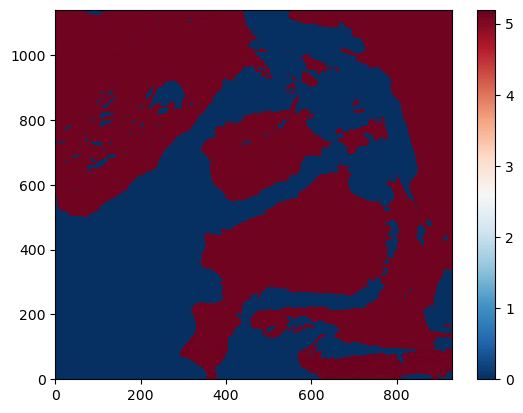

In [84]:
# plt.contourf(ds.U.isel(time=25,Z=26).values,levels=np.arange(-1.7,1.8,0.1),cmap='RdBu_r')
plt.pcolormesh(ds.T.isel(time=25,Z=26).values,cmap='RdBu_r')
# plt.ylim(0,50)
# plt.xlim(600,800)
plt.colorbar()

# for out diag files

In [2]:
# outs_sn
# ds_sn=[]
# ds_sn = xmitgcm.open_mdsdataset('/home/ceoas/liux8/work/basin_modes/sulu_sea/res100_runs/ctrl_tides_dt100',prefix=['outs_sn'])
# ds_sn2 = xmitgcm.open_mdsdataset('/home/ceoas/liux8/work/basin_modes/sulu_sea/res100_runs/ctrl_tides',prefix=['outs_sn'])
ds_eta = xmitgcm.open_mdsdataset('/home/ceoas/liux8/work/basin_modes/sulu_sea/res100_runs/ctrl_tides',prefix=['outs_sn_etan'])
ds_eta

<xarray.Dataset> Size: 3GB
Dimensions:  (XC: 1520, YC: 1908, XG: 1520, YG: 1908, Z: 57, Zp1: 58, Zu: 57,
              Zl: 57, time: 17)
Coordinates: (12/37)
  * XC       (XC) >f4 6kB 112.5 112.5 112.5 112.5 ... 127.7 127.7 127.7 127.7
  * YC       (YC) >f4 8kB -3.295 -3.285 -3.275 -3.265 ... 15.76 15.77 15.77
  * XG       (XG) >f4 6kB 112.5 112.5 112.5 112.5 ... 127.7 127.7 127.7 127.7
  * YG       (YG) >f4 8kB -3.3 -3.29 -3.28 -3.27 ... 15.74 15.75 15.76 15.77
  * Z        (Z) >f4 228B -12.5 -37.5 -62.5 ... -4.062e+03 -4.453e+03 -4.908e+03
  * Zp1      (Zp1) >f4 232B 0.0 -25.0 -50.0 ... -4.247e+03 -4.658e+03 -5.158e+03
    ...       ...
    maskInW  (YC, XG) bool 3MB dask.array<chunksize=(1908, 1520), meta=np.ndarray>
    dxF      (YC, XC) >f4 12MB dask.array<chunksize=(1908, 1520), meta=np.ndarray>
    maskInC  (YC, XC) bool 3MB dask.array<chunksize=(1908, 1520), meta=np.ndarray>
    maskInS  (YG, XC) bool 3MB dask.array<chunksize=(1908, 1520), meta=np.ndarray>
    iter     (time) int64 136B dask.array<chunksize=(1,), meta=np.ndarray>
  * time     (time) timedelta64[ns] 136B 00:00:00 00:00:10 ... 00:02:30 00:02:40
Data variables:
    ETAN     (time, YC, XC) float32 197MB dask.array<chunksize=(1, 1908, 1520), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    title:        netCDF wrapper of MITgcm MDS binary data
    source:       MITgcm
    history:      Created by calling `open_mdsdataset(data_dir='/home/ceoas/l...

In [5]:
ds_sn

<xarray.Dataset> Size: 175GB
Dimensions:  (XC: 1520, YC: 1908, XG: 1520, YG: 1908, Z: 57, Zp1: 58, Zu: 57,
              Zl: 57, time: 52)
Coordinates: (12/37)
  * XC       (XC) >f4 6kB 112.5 112.5 112.5 112.5 ... 127.7 127.7 127.7 127.7
  * YC       (YC) >f4 8kB -3.295 -3.285 -3.275 -3.265 ... 15.76 15.77 15.77
  * XG       (XG) >f4 6kB 112.5 112.5 112.5 112.5 ... 127.7 127.7 127.7 127.7
  * YG       (YG) >f4 8kB -3.3 -3.29 -3.28 -3.27 ... 15.74 15.75 15.76 15.77
  * Z        (Z) >f4 228B -12.5 -37.5 -62.5 ... -4.062e+03 -4.453e+03 -4.908e+03
  * Zp1      (Zp1) >f4 232B 0.0 -25.0 -50.0 ... -4.247e+03 -4.658e+03 -5.158e+03
    ...       ...
    maskInW  (YC, XG) bool 3MB dask.array<chunksize=(1908, 1520), meta=np.ndarray>
    dxF      (YC, XC) >f4 12MB dask.array<chunksize=(1908, 1520), meta=np.ndarray>
    maskInC  (YC, XC) bool 3MB dask.array<chunksize=(1908, 1520), meta=np.ndarray>
    maskInS  (YG, XC) bool 3MB dask.array<chunksize=(1908, 1520), meta=np.ndarray>
    iter     (time) int64 416B dask.array<chunksize=(1,), meta=np.ndarray>
  * time     (time) timedelta64[ns] 416B 00:00:00 00:00:36 ... 00:30:00 00:30:36
Data variables:
    UVEL     (time, Z, YC, XG) float32 34GB dask.array<chunksize=(1, 57, 1908, 1520), meta=np.ndarray>
    VVEL     (time, Z, YG, XC) float32 34GB dask.array<chunksize=(1, 57, 1908, 1520), meta=np.ndarray>
    WVEL     (time, Zl, YC, XC) float32 34GB dask.array<chunksize=(1, 57, 1908, 1520), meta=np.ndarray>
    THETA    (time, Z, YC, XC) float32 34GB dask.array<chunksize=(1, 57, 1908, 1520), meta=np.ndarray>
    PHIHYD   (time, Z, YC, XC) float32 34GB dask.array<chunksize=(1, 57, 1908, 1520), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    title:        netCDF wrapper of MITgcm MDS binary data
    source:       MITgcm
    history:      Created by calling `open_mdsdataset(data_dir='/home/ceoas/l...

(-4.0, 0.0)

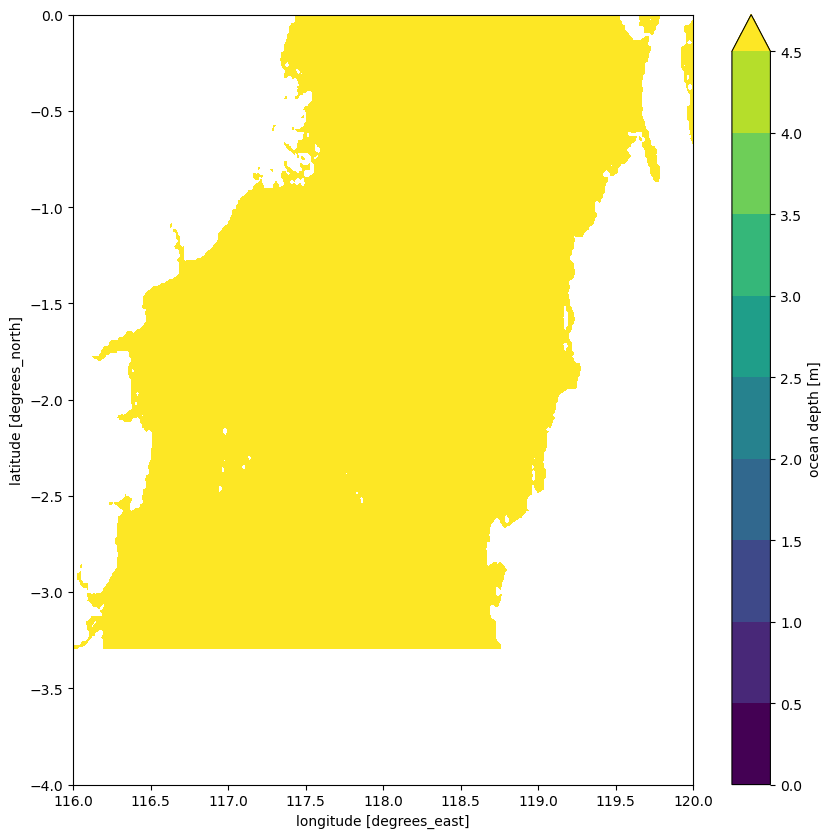

In [10]:
h = ds_eta.Depth
h2 = h.where(h!=0,) 
plt.figure(figsize=(10,10))
h2.plot.contourf(levels=np.arange(0,5,0.5))
# plt.ylim(-2.6,0)
# plt.xlim(116,117)
plt.xlim(116,120)
plt.ylim(-4,0)

## 1. plot ETA and make GIF

In [ ]:
fig_folder = 'eta_plots_res100_ctrl_v1'
try:
    os.mkdir(fig_folder)
    print(f"Folder '{fig_folder}' created.")
except FileExistsError:
    print(f"Folder '{fig_folder}' already exists.")

lon = ds_sn.XC
lat = ds_sn.YC
for it in range(0,193):
    t0 = ds_eta.time[it].values*100/np.timedelta64(1, 'h')
    eplt = ds_eta.ETAN.isel(time=it)
    eplt = eplt.where(eplt!=0,np.nan)
    plt.figure(figsize=(8,7))
    plt.contourf(lon,lat,eplt,cmap='RdBu',levels=np.arange(-3,3.2,0.2))
    plt.xlabel('Longitude ($^o$E)')
    plt.ylabel('Latitude ($^o$N)')
    plt.colorbar()
    plt.title(f'Eta at {t0:4f} hours')
    plt.ylim(-3.3,0)
    plt.xlim(116,120)
    
    plt.savefig(f'{fig_folder}/eta_it{it:03d}.png')
    plt.close()

Folder 'eta_plots_res100_ctrl_v1' already exists.


(116.0, 120.0)

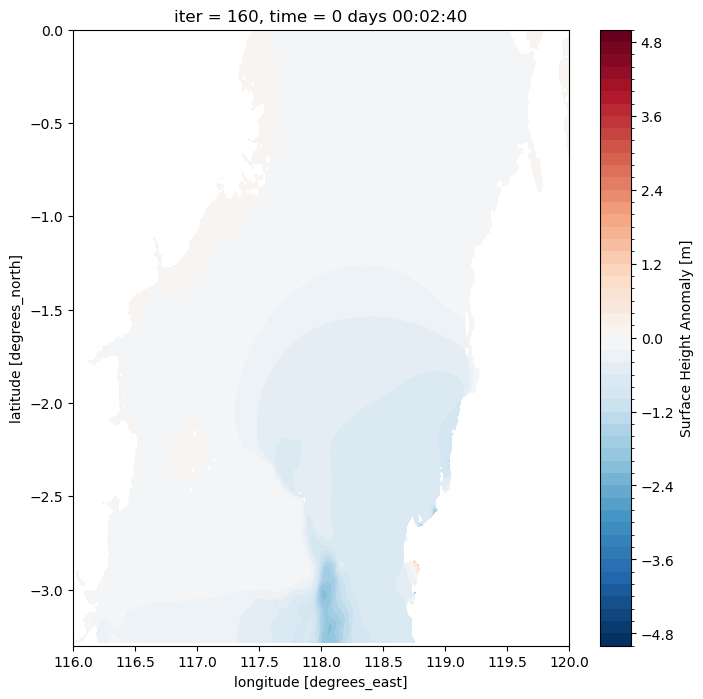

In [3]:
plt.figure(figsize=(8,8))

ds_eta.ETAN.where(ds_eta.ETAN!=0).isel(time=16).plot.contourf(levels=np.arange(-5,5.2,0.2))
# ds_eta.ETAN.where(ds_eta.ETAN!=0).isel(time=40).plot()
# plt.xlim(120,122)
# plt.ylim(5,7)
plt.ylim(-3.3,0)
plt.xlim(116,120)

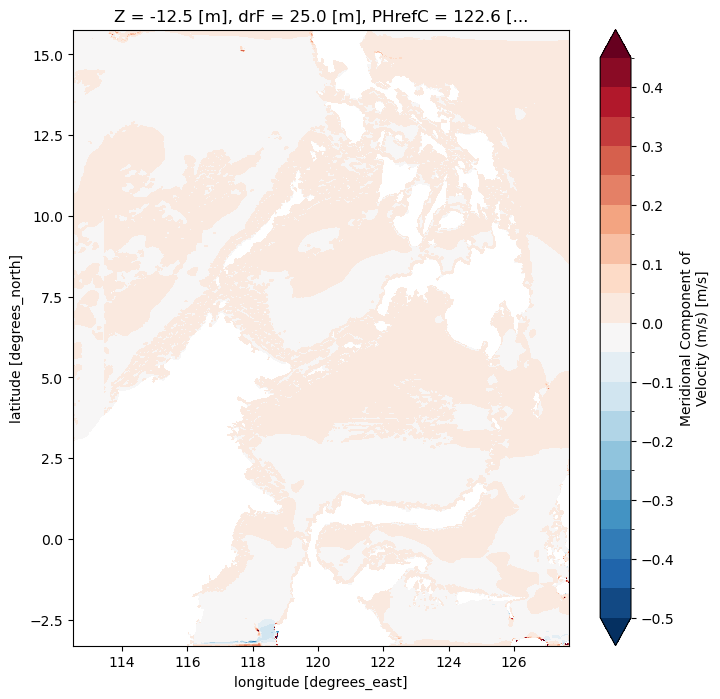

In [20]:
plt.figure(figsize=(8,8))

ds_sn.VVEL.where(ds_sn.VVEL!=0).isel(time=4,Z=0).plot.contourf(levels=np.arange(-0.5,0.5,0.05))
# ds_sn.THETA.where(ds_sn.THETA!=0).isel(time=10,Z=10).plot.contourf()

# ds_eta.ETAN.where(ds_eta.ETAN!=0).isel(time=40).plot()
# plt.xlim(120,122)
# plt.ylim(5,7)
# plt.ylim(-3.3,0)
# plt.xlim(116,120)

(116.0, 119.0)

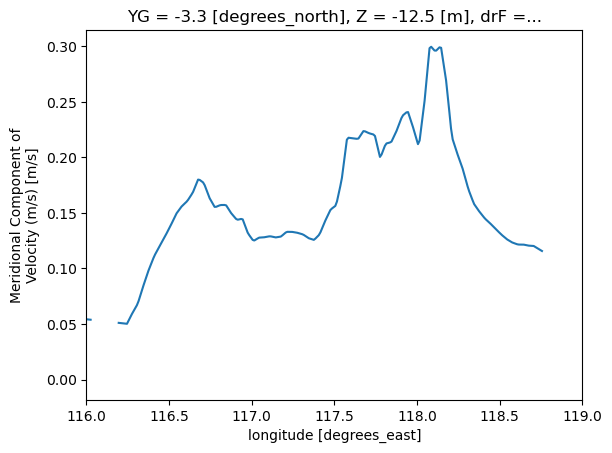

In [19]:
vbnd = ds_sn.VVEL.where(ds_sn.VVEL!=0).isel(time=8,YG=0,Z=0)
# vbnd.plot(vmax=0.3,vmin=-0.3)
vbnd.plot()
# plt.ylim(-2000,0)
plt.xlim(116,119)

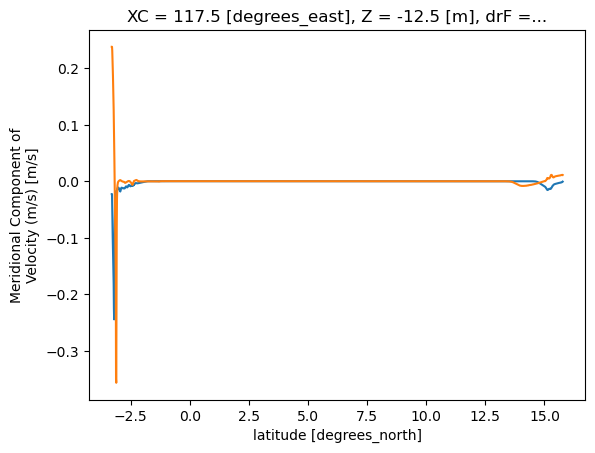

In [25]:
ds_sn.VVEL.isel(XC=500,Z=0,time=3).plot()
ds_sn.VVEL.isel(XC=500,Z=0,time=6).plot()

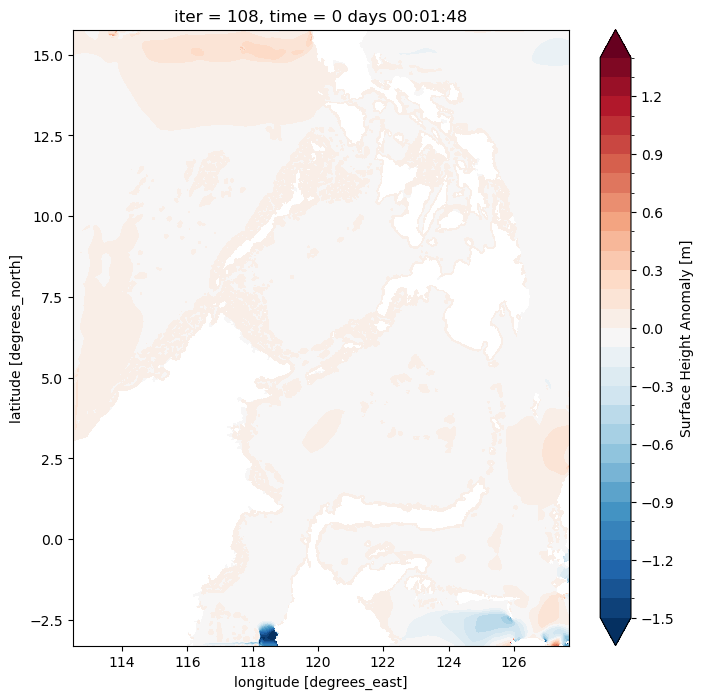

In [39]:
plt.figure(figsize=(8,8))

ds_eta.ETAN.where(ds_eta.ETAN!=0).isel(time=3).plot.contourf(levels=np.arange(-1.5,1.5,0.1))

In [3]:
# Create a GIF from the saved PNG images
fig_folder = 'eta_plots_res100_ctrl_v1'
itmax=34
idt=1
png_files = [f'{fig_folder}/eta_it{i:03d}.png' for i in range(0, itmax+idt, idt)]

# Check if all files exist
existing_files = [f for f in png_files if os.path.exists(f)]
if existing_files:
    # Create the gif
    with imageio.get_writer(f'{fig_folder}/eta_animation_m2_v1.gif', mode='I',palettesize=64, duration=500.0, loop=0) as writer:
        for filename in existing_files:
            image = imageio.v2.imread(filename)
            writer.append_data(image)

    print(f"Created GIF with {len(existing_files)} frames at '{fig_folder}/eta_animation_m2_v1.gif'")
else:
    print("No PNG files found to create GIF.")

Created GIF with 35 frames at 'eta_plots_res100_ctrl_v1/eta_animation_m2_v1.gif'


## 2. plot VVEL

In [15]:
fig_folder = 'vvel_plots_res100_ctrl_v1'
try:
    os.mkdir(fig_folder)
    print(f"Folder '{fig_folder}' created.")
except FileExistsError:
    print(f"Folder '{fig_folder}' already exists.")

lon = ds_sn.XC
lat = ds_sn.YC
for it in range(0,10):
    t0 = ds_eta.time[it].values*100/np.timedelta64(1, 'h')
    # eplt = ds_eta.ETAN.isel(time=it)
    vplt = ds_sn.VVEL.isel(time=it, Z=0)
    vplt = vplt.where(vplt!=0,np.nan)
    plt.figure(figsize=(8,7))
    plt.contourf(lon,lat,vplt,cmap='RdBu',levels=np.arange(-0.5,0.55,0.05))
    plt.xlabel('Longitude ($^o$E)')
    plt.ylabel('Latitude ($^o$N)')
    plt.colorbar()
    plt.title(f'Eta at {t0:4f} hours')
    plt.ylim(-3.6,0)
    plt.xlim(116,120)
    
    plt.savefig(f'{fig_folder}/vvel_it{it:03d}.png')
    plt.close()

Folder 'vvel_plots_res100_ctrl_v1' already exists.


In [40]:
fig_folder = 'eta_plots_res100_ctrl_v2'
try:
    os.mkdir(fig_folder)
    print(f"Folder '{fig_folder}' created.")
except FileExistsError:
    print(f"Folder '{fig_folder}' already exists.")

lon = ds_sn.XC
lat = ds_sn.YC
for it in range(0,193):
    t0 = ds_eta.time[it].values*100/np.timedelta64(1, 'h')
    eplt = ds_eta.ETAN.isel(time=it)
    eplt = eplt.where(eplt!=0,np.nan)
    plt.figure(figsize=(8,7))
    plt.contourf(lon,lat,eplt,cmap='RdBu',levels=np.arange(-3,3.2,0.2))
    plt.xlabel('Longitude ($^o$E)')
    plt.ylabel('Latitude ($^o$N)')
    plt.colorbar()
    plt.title(f'Eta at {t0:4f} hours')
    plt.ylim(-3.6,0)
    plt.xlim(116,120)
    
    plt.savefig(f'{fig_folder}/eta_it{it:03d}.png')
    plt.close()

Folder 'eta_plots_res100_ctrl_v2' created.


IndexError: index 15 is out of bounds for axis 0 with size 15

In [141]:
from PIL import Image
import os

def create_high_quality_gif(image_folder, output_filename="output.gif", duration=100, loop=0):
    """
    Creates a high-quality GIF from a folder of images.

    Args:
        image_folder (str): Path to the folder containing the image frames.
        output_filename (str): Name of the output GIF file.
        duration (int): Duration of each frame in milliseconds (e.g., 100 for 0.1 seconds).
        loop (int): Number of times the GIF should loop (0 for infinite loop).
    """
    image_files = sorted([os.path.join(image_folder, f) for f in os.listdir(image_folder) if f.endswith(('.png', '.jpg', '.jpeg'))])

    if not image_files:
        print("No image files found in the specified folder.")
        return

    # Open the first image to use as the base for the GIF
    first_frame = Image.open(image_files[0])

    # Load the rest of the images as frames
    frames = [Image.open(f) for f in image_files[1:]]

    # Save the GIF
    first_frame.save(
        output_filename,
        save_all=True,
        append_images=frames,
        duration=duration,
        loop=loop,
        subsampling=0, quality=1999
        # optimize=True  # Optimize the GIF for smaller file size
    )
    print(f"GIF '{output_filename}' created successfully!")

# Example usage:
# Assuming your images are in a folder named 'frames' in the same directory as your script
create_high_quality_gif("eta_plots", output_filename="my_animation.gif", duration=150)

GIF 'my_animation.gif' created successfully!


## 2. plot temp at 150 m and make GIF

In [ ]:
fig_folder = 't100_plots_norbcs'
try:
    os.mkdir(fig_folder)
    print(f"Folder '{fig_folder}' created.")
except FileExistsError:
    print(f"Folder '{fig_folder}' already exists.")

temp100 = ds_sn.THETA.isel(Z=5)

lon = ds_sn.XC
lat = ds_sn.YC
for it in range(0,194):
    t0 = ds_sn.time[it].values*100/np.timedelta64(1, 'h')
    temp = (temp100.isel(time=it)-temp100.isel(time=0)).values
    temp[temp==0] = np.nan
    plt.figure(figsize=(8,7))
    plt.contourf(lon,lat,temp,cmap='RdBu',levels=np.arange(-1.5,1.6,0.1),extend='both')
    plt.xlabel('Longitude ($^o$E)')
    plt.ylabel('Latitude ($^o$N)')
    plt.colorbar()
    plt.title(f'Temp Anomaly at {t0:4f} hours')
    
    plt.savefig(f'{fig_folder}/temp_it{it:03d}.png')
    plt.close()

Folder 't100_plots_norbcs' created.


In [6]:
# Create a GIF from the saved PNG images
# fig_folder = 'figures_MyBreakTank_step8c_0.1s_zoom/'
fig_folder = 't100_plots_norbcs'
itmax=137
idt=1
png_files = [f'{fig_folder}/temp_it{i:03d}.png' for i in range(0, itmax+idt, idt)]

# Check if all files exist
existing_files = [f for f in png_files if os.path.exists(f)]
if existing_files:
    # Create the gif
    with imageio.get_writer(f'{fig_folder}/temp_animation_m2_v1.gif', mode='I',palettesize=64, duration=500.0, loop=0) as writer:
        for filename in existing_files:
            image = imageio.v2.imread(filename)
            writer.append_data(image)

    print(f"Created GIF with {len(existing_files)} frames at '{fig_folder}/temp_animation_m2_v1.gif'")
else:
    print("No PNG files found to create GIF.")

Created GIF with 138 frames at 't100_plots_norbcs/temp_animation_m2_v1.gif'


# get elevation data

In [11]:
ttseries = (ds_eta.time.values*100/np.timedelta64(1, 'h'))[20:]
etseries = ds_eta.ETAN.isel(XC=2,YC=1000).values[20:]
plt.plot(etseries)
etseries = ds_eta.ETAN.isel(XC=20,YC=1000).values[20:]
plt.plot(etseries)
etseries = ds_eta.ETAN.isel(XC=200,YC=1000).values[20:]
plt.plot(etseries)

print(ttseries)


KeyboardInterrupt



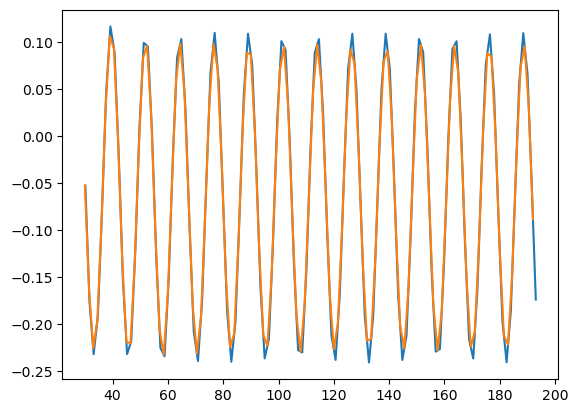

In [40]:
t1 = np.arange(30,193,1.5)
etseries_interp = np.interp(t1,ttseries, etseries)
plt.plot(ttseries, etseries)
plt.plot(t1,etseries_interp)

In [18]:
temp100 = ds_sn.THETA.isel(Z=5)
temp_t = temp100.isel(XC=2,YC=1000)
temp_t2 = temp100.isel(XC=200,YC=1000)

In [ ]:
# ttseries = (ds_eta.time.values*100/np.timedelta64(1, 'h'))
# plt.plot(ttseries,temp_t)
# plt.plot(ttseries,temp_t2)
# ttseries

temp_t.plot()
temp_t2.plot()

In [80]:

@contextmanager
def suppress_stdout():
    """Context manager to suppress printing to standard output."""
    with open(os.devnull, "w") as devnull:
        old_stdout = sys.stdout
        sys.stdout = devnull
        try:
            yield
        finally:
            sys.stdout = old_stdout

t1 = np.arange(30,193,1.5)
ttseries = (ds_sn.time.values*100/np.timedelta64(1, 'h'))[20:]
# t = np.arange(0, 30*24, 1)   # 30 days hourly
# # t = pd.to_datetime(np.arange(0, 100*24, 0.5), unit='h', origin='2023-01-01')

# # Two tidal constituents: M2 (12.42h), S2 (12.00h)
# # signal = 1.5 * np.cos(2*np.pi*t.hour/12.42) + 0.5 * np.cos(2*np.pi*t.hour/12.0 + np.pi/4)
# signal = 2.5 * np.cos(2*np.pi*t/12.42)
amp_m2_model = np.zeros((930,1140))
pha_m2_model = np.zeros((930,1140))
for ii in range(0,1140,10):
    for jj in range(0,930,10):
        print(ii,jj)
        etseries = ds_sn.ETAN.isel(XC=jj,YC=ii).values[20:]
        etseries_interp = np.interp(t1,ttseries, etseries)
        with suppress_stdout():
            # Any print statements within this block will be suppressed
            xout = tt.t_tide(etseries_interp,dt=1.5,constitnames=['M2'])
    
        amp_m2_model[jj,ii] = xout['tidecon'][0][0]
        pha_m2_model[jj,ii] = xout['tidecon'][0][2]

0 0
0 10
0 20
0 30
0 40
0 50
0 60
0 70
0 80
0 90
0 100
0 110
0 120
0 130
0 140
0 150
0 160
0 170
0 180
0 190
0 200
0 210
0 220
0 230
0 240
0 250
0 260
0 270
0 280
0 290
0 300
0 310
0 320
0 330
0 340
0 350
0 360
0 370
0 380
0 390
0 400
0 410
0 420
0 430
0 440
0 450
0 460
0 470
0 480
0 490
0 500
0 510
0 520
0 530
0 540
0 550
0 560
0 570
0 580
0 590
0 600
0 610
0 620
0 630
0 640
0 650
0 660
0 670
0 680
0 690
0 700
0 710
0 720
0 730
0 740
0 750
0 760
0 770
0 780
0 790
0 800
0 810
0 820
0 830
0 840
0 850
0 860
0 870
0 880
0 890
0 900
0 910
0 920
10 0
10 10
10 20
10 30
10 40
10 50
10 60
10 70
10 80
10 90
10 100
10 110
10 120
10 130
10 140
10 150
10 160
10 170
10 180
10 190
10 200
10 210
10 220
10 230
10 240
10 250
10 260
10 270
10 280
10 290
10 300
10 310
10 320
10 330
10 340
10 350
10 360
10 370
10 380
10 390
10 400
10 410
10 420
10 430
10 440
10 450
10 460
10 470
10 480
10 490
10 500
10 510
10 520
10 530
10 540
10 550
10 560
10 570
10 580
10 590
10 600
10 610
10 620
10 630
10 640
10 650
10

In [98]:
lontide = ds_sn.XC.values[0:930:10]
lattide = ds_sn.YC.values[0:1140:10]

amp_m2 = xr.DataArray(
        amp_m2_model[0:930:10,0:1140:10].T,
        coords={'y': lattide, 'x': lontide},
        dims=['y', 'x'],
        name='amp_m2'
    )
pha_m2 = xr.DataArray(
        pha_m2_model[0:930:10,0:1140:10].T,
        coords={'y': lattide, 'x': lontide},
        dims=['y', 'x'],
        name='pha_m2'
    )
ds_tide = xr.merge([amp_m2, pha_m2])
ds_tide.to_netcdf('amp_pha_m2_model.nc')

Text(0.5, 1.0, 'Model M2 Tidal Amplitude (m)')

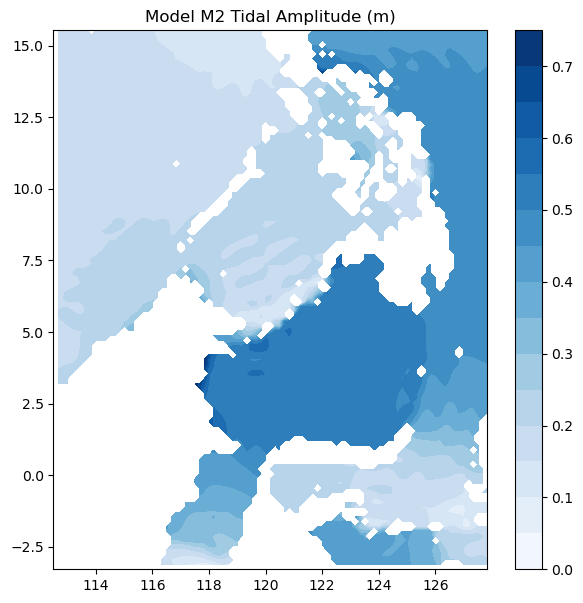

In [122]:
# ds_tide.amp_m2.where(ds_tide.pha_m2!=0).plot.contourf(levels=np.arange(0,0.8,0.05),vmax=0.75)

plt.figure(figsize=(7,7))
plt.contourf(lontide,lattide,ds_tide.amp_m2.where(ds_tide.pha_m2!=0),levels=np.arange(0,0.8,0.05),vmax=0.75,cmap='Blues')
plt.colorbar()
plt.title('Model M2 Tidal Amplitude (m)')
# plt.contour(lontide,lattide,ds_tide.amp_m2.where(ds_tide.pha_m2!=0),levels=np.arange(0,0.8,0.1),colors='k')

Text(0.5, 1.0, 'Model M2 Tidal Phase (degree)')

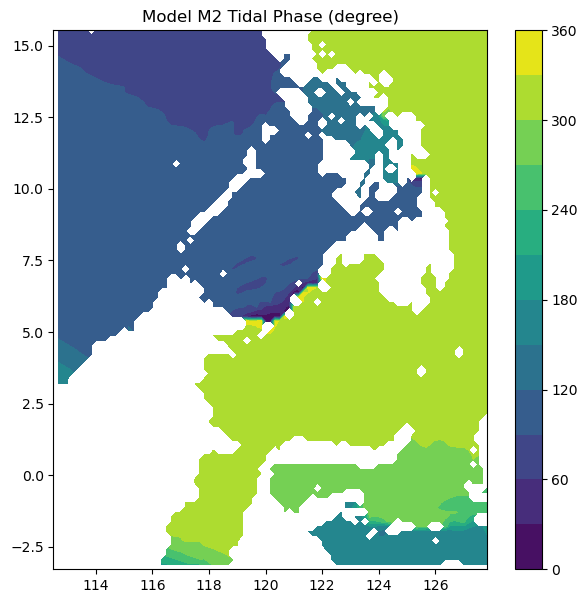

In [123]:
# ds_tide.pha_m2.where(ds_tide.pha_m2!=0).plot(levels=np.arange(0,375,30))
plt.figure(figsize=(7,7))
plt.contourf(lontide,lattide,ds_tide.pha_m2.where(ds_tide.pha_m2!=0),levels=np.arange(0,375,30))
plt.colorbar()
plt.title('Model M2 Tidal Phase (degree)')

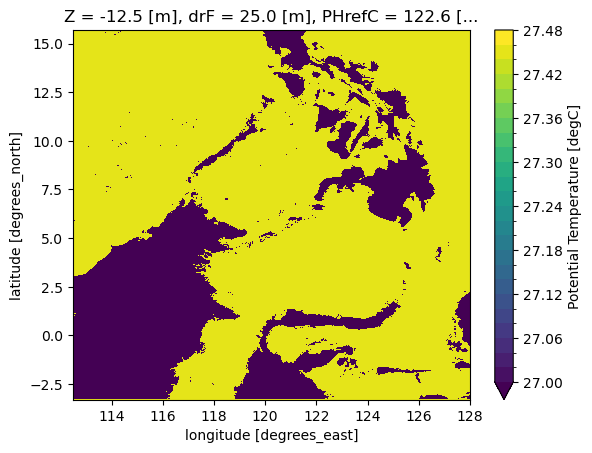

In [24]:
ds_sn.THETA.isel(time=0,Z=0).plot(levels=np.arange(27,27.5,0.02))

(116.0, 122.0)

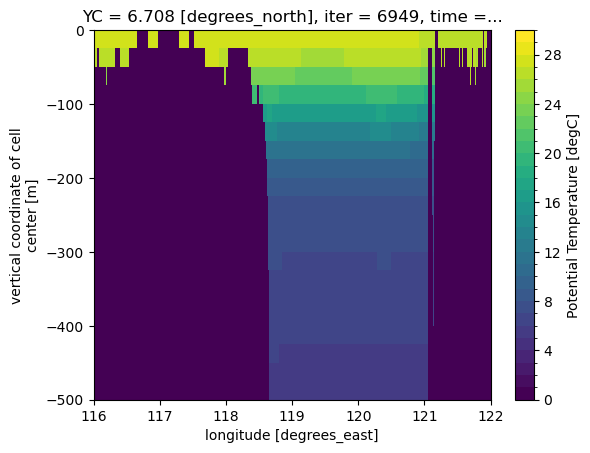

In [42]:
ds_sn.THETA.isel(time=128,YC=600).plot.pcolormesh(levels = np.arange(0,31,1))
plt.ylim(-500,0)
plt.xlim(116,122)

# vertical sections

In [51]:
x0 = np.linspace(112.508333333333333,127.99166666666666667,930)
y0 = np.linspace(-3.2916666666666667,15.691666666666666667,1140)
xmodel,ymodel = np.meshgrid(x0,y0)

In [78]:
from scipy.interpolate import RegularGridInterpolator
spacing = 0.005  # about 0.3 minutes

theta_sec_tseries = []
for it in range(129):
    print(it)
    theta_sec1 = []
    for ik in range(57):
    
        t0 = ds_sn.THETA.isel(time=it, Z=ik).values.T
        t0[t0==0] = np.nan
        interp_func = RegularGridInterpolator((x0,y0), t0)
        
        # Section 1: (118°E, 10°N) to (121°E, 6°N)
        xsec1 = np.arange(118.5, 121+spacing, spacing)
        ysec1 = np.arange(9.333333333333334, 6-spacing, -spacing)
        if len(xsec1) != len(ysec1):
            points_needed = min(len(xsec1), len(ysec1))
            xsec1 = np.linspace(118.5, 121, points_needed)
            ysec1 = np.linspace(9.333333333333334, 6, points_needed)
        pts_sec1 = (xsec1, ysec1)
        
        theta_sec1.append(interp_func(pts_sec1))
    theta_sec1 = np.array(theta_sec1)
    theta_sec_tseries.append(theta_sec1)
theta_sec1_tseries = np.array(theta_sec1_tseries)

# distances_sec1 = np.sqrt((xsec1-xsec1[0])**2 + (ysec1-ysec1[0])**2) * 111

# # Extract water depths along each section directly from toposulu dataset
# depths_sec1 = np.zeros((57,len(xsec1)))

# # For each point in each section, find the nearest data point in toposulu
# for ik in range(57):
#     print(ik)
#     for i in range(len(xsec1)):
#         depths_sec1[ik,i] = ds_sn.THETA.isel(time=-1, Z=ik).sel(XC=xsec1[i], YC=ysec1[i], method='nearest').values

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128


In [72]:
theta_sec1 = np.array(theta_sec1)

(-500.0, 0.0)

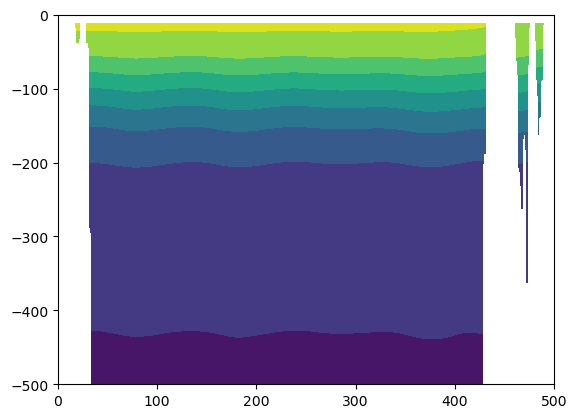

In [77]:
plt.contourf(range(len(xsec1)),ds_sn.Z,theta_sec1)
plt.ylim(-500,0)

# vertical profile in Sulu

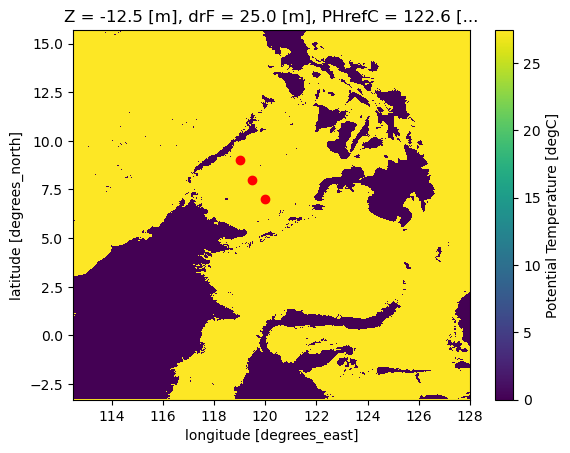

In [79]:
ds_sn.THETA.isel(time=0,Z=0).plot()
plt.plot(120,7,'or')
plt.plot(119.5,8,'or')
plt.plot(119,9,'or')

In [76]:
temp_profile1 = ds_sn.THETA.isel(YC=618,XC=450).values
temp_profile2 = ds_sn.THETA.isel(YC=678,XC=420).values

In [80]:
temp_profile3 = ds_sn.THETA.isel(YC=738,XC=390).values

In [47]:
zprofile = ds_sn.Z
tprofile = ds_sn.time

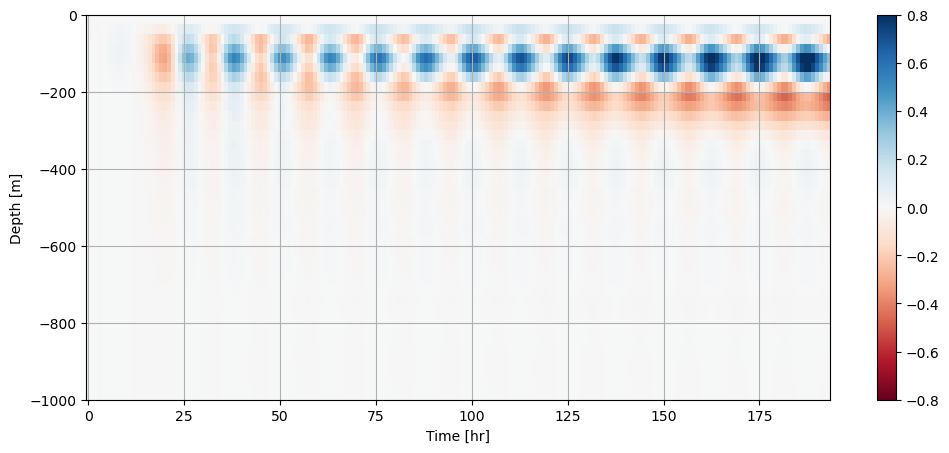

In [64]:
plt.figure(figsize=(12,5))
plt.pcolormesh(np.arange(194), zprofile, (temp_profile1-temp_profile1[0,:]).T,cmap='RdBu',vmax=0.8, vmin=-0.8)
plt.ylim(-1000,0)
plt.xlabel('Time [hr]')
plt.ylabel('Depth [m]')
plt.grid('on')
plt.colorbar()

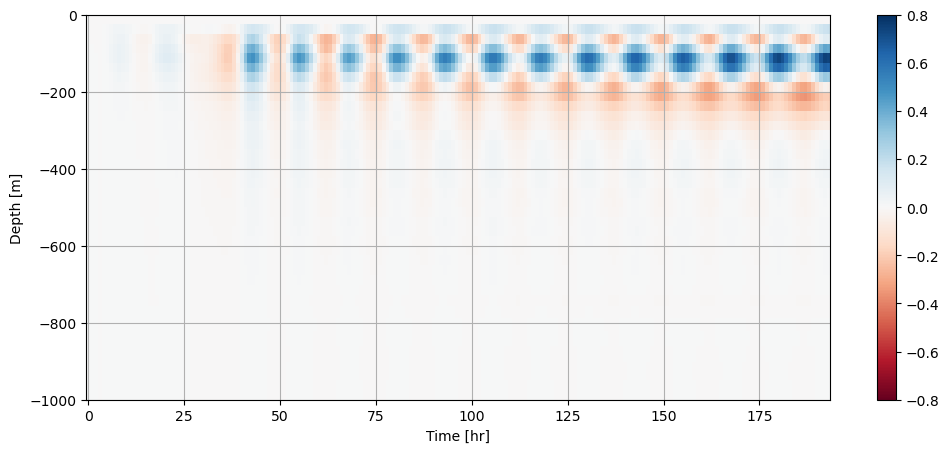

In [77]:
plt.figure(figsize=(12,5))
plt.pcolormesh(np.arange(194), zprofile, (temp_profile2-temp_profile2[0,:]).T,cmap='RdBu',vmax=0.8, vmin=-0.8)
plt.ylim(-1000,0)
plt.xlabel('Time [hr]')
plt.ylabel('Depth [m]')
plt.grid('on')
plt.colorbar()

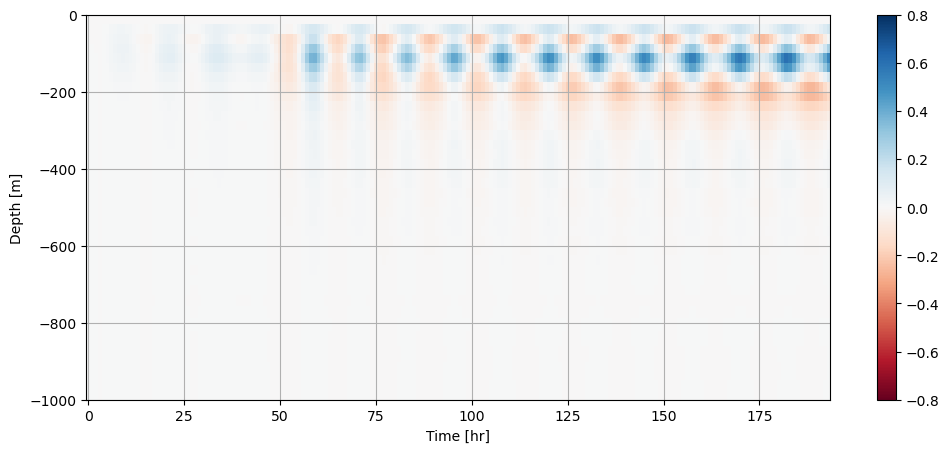

In [81]:
plt.figure(figsize=(12,5))
plt.pcolormesh(np.arange(194), zprofile, (temp_profile3-temp_profile3[0,:]).T,cmap='RdBu',vmax=0.8, vmin=-0.8)
plt.ylim(-1000,0)
plt.xlabel('Time [hr]')
plt.ylabel('Depth [m]')
plt.grid('on')
plt.colorbar()

In [54]:
temp_profile1.shape

(194, 57)

In [75]:
ds_sn.YC[678]

<xarray.DataArray 'YC' ()> Size: 4B
array(8.008333, dtype='>f4')
Coordinates:
    YC       >f4 4B 8.008
Attributes:
    standard_name:  latitude
    long_name:      latitude
    units:          degrees_north
    coordinate:     YC XC
    axis:           Y